In [76]:
import numpy as np

import mlgrad.models as models
import mlgrad.loss as loss
import mlgrad.gd as gd
import mlgrad.funcs as funcs
import mlgrad.funcs2 as funcs2
import mlgrad.risks as risks
import mlgrad.cls as cls
import mlgrad.plots as plots

from pprint import pprint

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [12]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [13]:
X = X.astype('d')
X /= 256.0

In [110]:
print(np.unique(Y))
print(X.shape[1])

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
784


784

In [133]:
X17 = X[(Y == '0')|(Y=='8')]
_Y17_ = Y[(Y == '0')|(Y=='8')]
Y17 = np.zeros_like(_Y17_, dtype='d')
Y17[_Y17_ == '0'] = 1
Y17[_Y17_ == '8'] = -1
print(Y17.shape)

(13728,)


In [134]:
from sklearn.model_selection import StratifiedKFold

In [135]:
n_input = X.shape[1]
def new_model(n_input):
    lm = models.LinearModel(n_input)
    lm.allocate()
    lm.init_param()
    return lm

In [136]:
cv = StratifiedKFold(3)
for It, Ic in cv.split(X17, Y17):
    Xt, Xc = X17[It], X17[Ic]
    Yt, Yc = Y17[It], Y17[Ic]
    lm = new_model(n_input)
    alg = cls.classification_as_regr(Xt, Yt, lm,
                             lossfunc=loss.MarginLoss(funcs.Hinge(1.0)),
                             regnorm=funcs2.SquareNorm(), 
                             normalizer=gd.Masked(lm.n_param, 1.0e-3),
                             tau=0.1, h=0.1)
    print("L:", accuracy_score(Yt, np.sign(lm.evaluate_all(Xt))))
    print("T:", accuracy_score(Yc, np.sign(lm.evaluate_all(Xc))))
    

L: 0.9885270979020979
T: 0.990166083916084
L: 0.9895104895104895
T: 0.9866695804195804
L: 0.9894012237762237
T: 0.9897290209790209


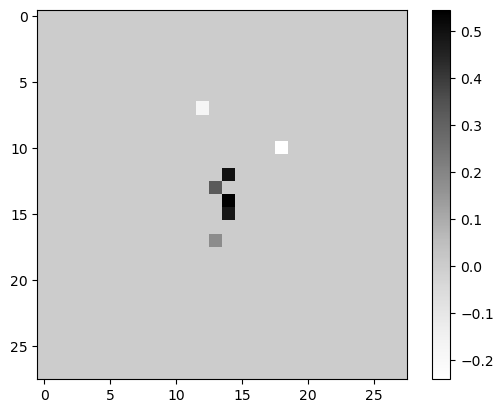

In [121]:
alg = cls.classification_as_regr(X17, Y17, lm,
                             lossfunc=loss.MarginLoss(funcs.Hinge(1.0)),
                             regnorm=funcs2.SquareNorm(), 
                             normalizer=gd.Masked(lm.n_param, 1.0e-2),
                             tau=1.0, h=0.1)
param = np.asarray(lm.param)
lm.param[:] = param / np.sqrt(param @ param)
param = np.asarray(lm.param)
# print(np.asarray(lm.param))
cb = plt.imshow(param[1:].reshape(28,28), cmap=plt.cm.Greys)
plt.colorbar(cb)
plt.show()

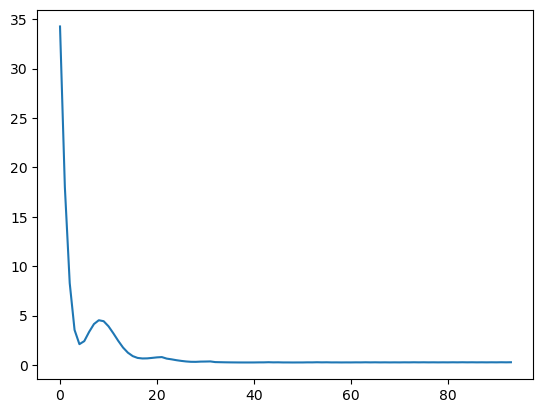

In [122]:
plt.plot(alg.lvals)
plt.show()

In [123]:
print(accuracy_score(Y17, np.sign(lm.evaluate_all(X17))))
print(np.sum(Y17*lm.evaluate_all(X17)>=0)/len(Y17))

0.8192485168094924
0.8248516809492419


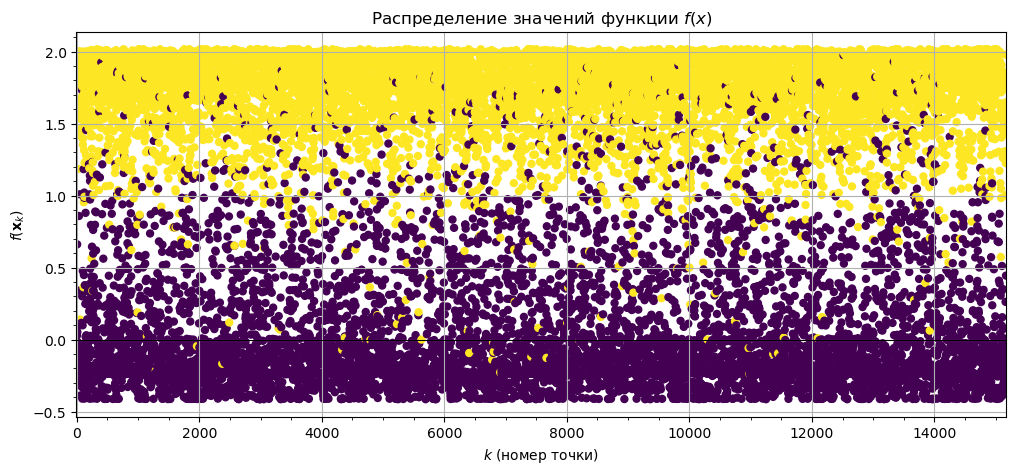

In [124]:
plt.figure(figsize=(12,5))
plots.plot_cls_function(lm, X17, Y17)
plt.show()